In [1]:
# !pip install spinesTS
import sys
sys.path.append('..')

# MLPTorchModel

In [2]:
from spinesTS.preprocessing import split_series
from spinesTS.plotting import plot2d
from sklearn.metrics import r2_score

In [3]:
from spinesTS.data import BuiltInSeriesData
from spinesTS.nn import WeightedDenseRNN
from spinesTS.metrics import mean_absolute_error
from spinesTS.metrics import mean_absolute_percentage_error

In [4]:
series_data = BuiltInSeriesData()

+----+----------------------+----------------------------------------------+
|    | table's name         | table's columns                              |
+----+----------------------+----------------------------------------------+
|  0 | ETTh1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  1 | ETTh2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  2 | ETTm1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  3 | ETTm2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT |
|  4 | Electric_Production  | date, value                                  |
|  5 | Messages_Sent        | date, ta, tb, tc                             |
|  6 | Messages_Sent_Hour   | date, hour, ta, tb, tc                       |
|  7 | Series_0             | date, timepoint, turnover_1, turnover_2      |
|  8 | Series_1             | date, timepoint, turnover_1, turnover_2      |
|  9 | Series_2             | date, timepoint, turnover_1, turnover_2      |

In [5]:
cs = series_data[7]
cs_data = cs.dataset['turnover_1']
x_train, x_test, y_train, y_test = split_series(cs_data, cs_data, 420, 420, train_size=0.8)

In [6]:
x_train.shape

(9024, 420)

## RecurrentWeightedDenseNet

### one res_dense_blocks

Epoch 1/1000 
282/282 - p0 - loss: 35.5599 - mae: 58.2505 - val_loss: 102.6664 - val_mae: 103.1652 - 2.47s/epoch - 0.009s/step
Epoch 2/1000 
282/282 - p0 - loss: 42.3691 - mae: 45.0629 - val_loss: 90.2782 - val_mae: 90.7768 - 2.50s/epoch - 0.009s/step
Epoch 3/1000 
282/282 - p0 - loss: 37.6943 - mae: 41.6762 - val_loss: 89.0646 - val_mae: 89.5632 - 2.51s/epoch - 0.009s/step
Epoch 4/1000 
282/282 - p0 - loss: 40.9719 - mae: 39.0071 - val_loss: 82.4574 - val_mae: 82.9559 - 2.50s/epoch - 0.009s/step
Epoch 5/1000 
282/282 - p0 - loss: 42.2618 - mae: 37.1588 - val_loss: 82.4438 - val_mae: 82.9423 - 2.43s/epoch - 0.009s/step
Epoch 6/1000 
282/282 - p0 - loss: 30.4485 - mae: 36.2930 - val_loss: 81.5753 - val_mae: 82.0738 - 2.42s/epoch - 0.009s/step
Epoch 7/1000 
282/282 - p1 - loss: 34.8312 - mae: 34.9759 - val_loss: 85.0676 - val_mae: 85.5662 - 2.39s/epoch - 0.008s/step
Epoch 8/1000 
282/282 - p2 - loss: 38.8227 - mae: 34.0198 - val_loss: 81.8900 - val_mae: 82.3885 - 2.40s/epoch - 0.009s/ste

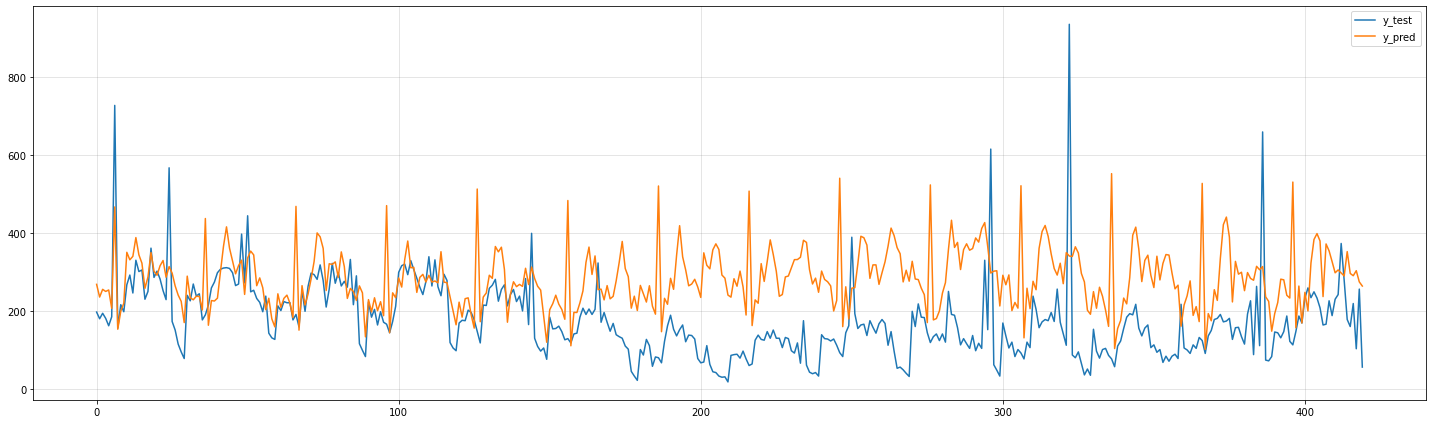

In [7]:
wdr = WeightedDenseRNN(420, 420, random_seed=42, level=1, learning_rate=0.01)
wdr.fit(x_train, y_train, eval_set=(x_test[:-2], y_test[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=True, lr_scheduler='ReduceLROnPlateau')
y_pred_cs = wdr.predict(x_test[-2:])
print(f"r2: {r2_score(y_test[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test[-2:], y_pred_cs)}")
a = plot2d(y_test[-2:], y_pred_cs, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

In [8]:
# r2: -1.6069860851397684
# mae: 94.37355222247896
# mape: 0.7744099343990346

In [9]:
# r2: -0.2951417932046846
# mae: 72.0731291384924
# mape: 0.49534329867232824

In [10]:
# wdr.model.state_dict()

In [11]:
wdr = WeightedDenseRNN(128, 24, random_seed=666, level=6, learning_rate=0.01)
wdr.fit(x_train, y_train, eval_set=(x_test[:-2], y_test[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=True)
y_pred_cs = wdr.predict(x_test[-2:])
print(f"r2: {r2_score(y_test[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test[-2:], y_pred_cs)}")
a = plot2d(y_test[-2:], y_pred_cs, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

RuntimeError: The size of tensor a (210) must match the size of tensor b (64) at non-singleton dimension 1

In [ ]:
# r2: -0.3864792376545837
# mae: 79.12119703974042
# mape: 0.5604488876406167